In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Envs import register
import gymnasium as gym
from stable_baselines3 import PPO
from vis_model import aggregate_eval, plot_eval, plot_multiple_eval
import plotly.express as px
import pandas as pd

pybullet build time: Oct  3 2024 08:55:45


---------------------------- evaluate_policy --------------------------------
---------------------------- evaluate_policy --------------------------------


In [2]:
model_path = "../checkpoints/StaticWaypointEnv/SingleWaypointNavigation/LOSAngleObs-Adjusted-MAYBEFIXED/best_model"
env_id = "SingleWaypointQuadXEnv-v0"

render = False
num_eval_eps = 5
env = gym.make(env_id, render_mode="human" if render else None)
_ = env.reset()
model = PPO.load(model_path, deterministic=True)

                             
Current Waypoint: [-0.31191529  2.17954445  3.        ]


# Visualizing Trajectory and Waypoints

In [3]:
result = aggregate_eval(model, env, num_eval_eps, render)
# print(result["waypoints"])

/Users/felixunterleiter/Documents/GitHub/pyflyt_experience/Evaluation/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


                             
Current Waypoint: [-0.20899404 -0.75913053  3.        ]
                             
Current Waypoint: [0.75412985 0.75206742 3.        ]
                             
Current Waypoint: [0.66008664 1.56691999 3.        ]
                             
Current Waypoint: [ 0.65755078 -1.58554466  3.        ]
                             
Current Waypoint: [ 0.46130921 -0.29627157  3.        ]
                             
Current Waypoint: [-2.65076697  1.95079869  3.        ]


In [48]:
data = []
for episode_index, (positions, waypoint) in enumerate(zip(result['linear_position'], result['waypoints'])):
    for pos in positions:
        data.append({
            'Episode': episode_index,
            'X': pos[0],
            'Y': pos[1],
            'Z': pos[2],
            'Type': 'Position'
        })
    # Adding waypoint for the episode
    data.append({
        'Episode': episode_index,
        'X': waypoint[0],
        'Y': waypoint[1],
        'Z': waypoint[2],
        'Type': 'Waypoint'
    })

df = pd.DataFrame(data)

# Plotting using Plotly Express
fig = px.scatter_3d(df, x='X', y='Y', z='Z', color='Episode', symbol='Type', title='Trajectory and Waypoints per Episode')
fig.update_traces(marker=dict(size=5))
fig.show()


# Smoothness of control inputs

/Users/felixunterleiter/Documents/GitHub/pyflyt_experience/Evaluation/vis_model.py:55: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



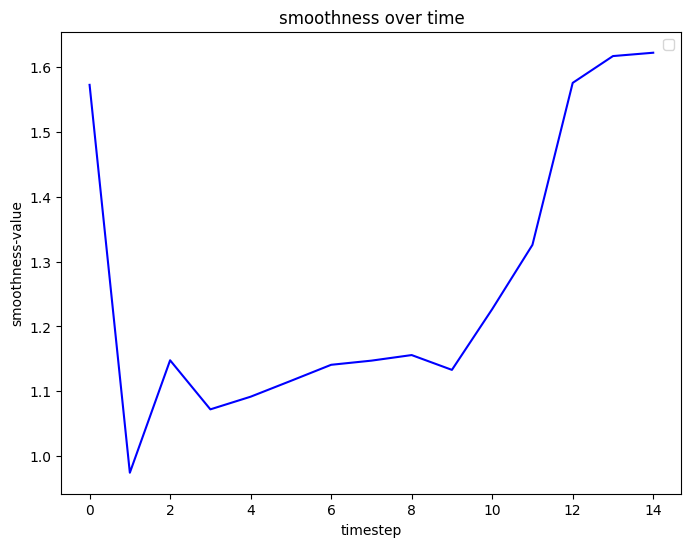

In [24]:
smoothness_result = {
    "smoothness": result["smoothness"]
}
plot_eval(smoothness_result, average=False)

# Azimuth and Elevation Angles

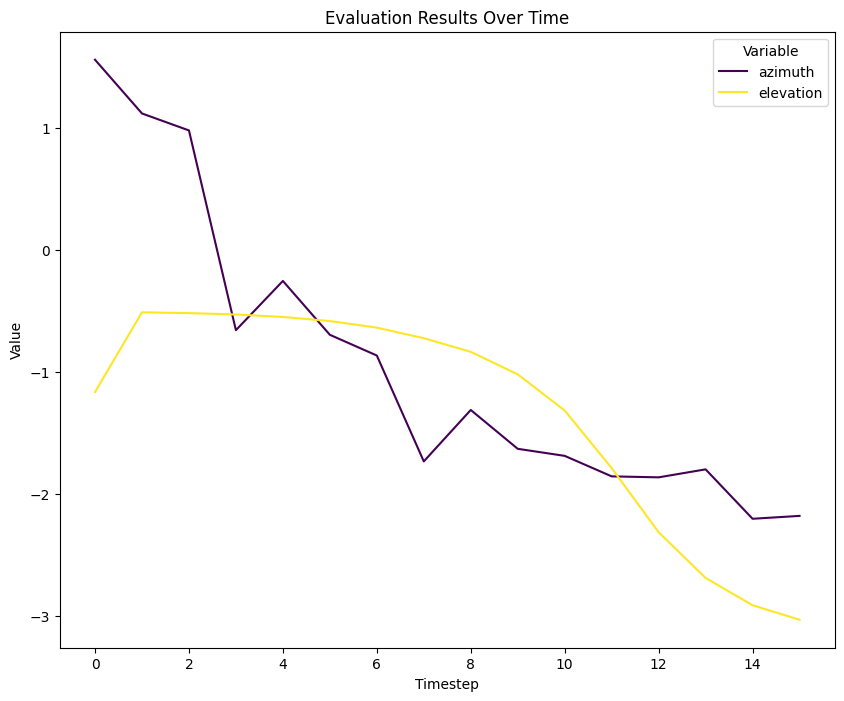

In [25]:
angles_result = {
    "azimuth": result["azimuth_angle"],
    "elevation": result["elevation_angle"]
}

plot_multiple_eval(angles_result, average=False)